# HEX algorithm **Kopuru Vespa Velutina Competition**

**XGBoost model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210609_batch_XGBy_48019prodigal.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [401]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

# Scaling data ------------------------------------
from sklearn import preprocessing

# XGBoost -----------------------------------------
#import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

## Functions

In [402]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):
    
    def template_checker(HEX):
        submission_df = (HEX["CODIGO MUNICIPIO"].astype("string") + HEX["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        template_df = (template["CODIGO MUNICIPIO"].astype("string") + template["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        check_df = pd.DataFrame({"submission_df":submission_df,"template_df":template_df})
        check_df["check"] = check_df.submission_df == check_df.template_df
        if (check_df.check == False).any():
            pd.options.display.max_rows = 112
            return check_df.loc[check_df.check == False,:]
        else:  
            return "All Municipality Names and Codes to be submitted match the Template"
    
    print("Submission form Shape is", HEX.shape)
    print("Number of Municipalities is", HEX["CODIGO MUNICIPIO"].nunique())
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

    assert HEX.shape == (112, 3), "Error: Shape is incorrect."
    assert HEX["CODIGO MUNICIPIO"].nunique() == 112, "Error: Number of unique municipalities is correct."    
    return template_checker(HEX)

## Get the data

In [403]:
QUEEN_train = pd.read_csv('../Feeder_years/WBds03_QUEENtrainYEARS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_years/WBds03_QUEENpredictYEARS.csv', sep=',')

clustersMario = pd.read_csv("../auxiliary_files/WBds_CLUSTERSnests.csv")

template = pd.read_csv("../../../Input_open_data/ds01_PLANTILLA-RETO-AVISPAS-KOPURU.csv",sep=";", encoding="utf-8")

In [404]:
#QUEEN_predict.isnull().sum()

In [405]:
QUEEN_train.shape

(224, 40)

In [406]:
QUEEN_predict.shape

(112, 40)

### Add in more Clusters (nest amount clusters)

In [407]:
QUEEN_train = pd.merge(QUEEN_train, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])

In [408]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [409]:
QUEEN_train.shape

(224, 41)

In [410]:
QUEEN_predict.shape

(112, 41)

In [411]:
QUEEN_predict.Cluster.value_counts()

0.0    66
2.0    41
1.0     4
4.0     1
Name: Cluster, dtype: int64

## Ready the data

In [412]:
# The target variable
y_train = QUEEN_train.loc[:, ['municip_code', 'year_offset', 'NESTS']]
y_train.set_index(['municip_code', 'year_offset'], inplace=True)
y_predict = QUEEN_predict.loc[:, ['municip_code', 'year_offset', 'NESTS']]
y_predict.set_index(['municip_code', 'year_offset'], inplace=True)


# The features matrix
X_train = QUEEN_train.drop(['municip_name', 'station_code', 'NESTS'], axis=1)
X_train.set_index(['municip_code', 'year_offset'], inplace=True)
X_predict = QUEEN_predict.drop(['municip_name', 'station_code', 'NESTS'], axis=1)
X_predict.set_index(['municip_code', 'year_offset'], inplace=True)

## Machine Learning time

### 1. Choose the model class

In [413]:
XGBRegressor

xgboost.sklearn.XGBRegressor

### 2. Instantiate the model

In [414]:
xgb = XGBRegressor()

### 3. Check my Features and Target shapes

In [415]:
X_train.shape

(224, 36)

In [416]:
y_train.shape

(224, 1)

In [417]:
X_predict.shape

(112, 36)

In [418]:
y_predict.shape

(112, 1)

### 4. Fit the model to the training data sets

In [419]:
X = X_train
y = y_train
scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [420]:
# define the model
model_fi = XGBRegressor()

# fit the model
model_fi.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Feature: 0, Score: 0.00065
Feature: 1, Score: 0.00106
Feature: 2, Score: 0.00015
Feature: 3, Score: 0.00106
Feature: 4, Score: 0.00028
Feature: 5, Score: 0.00056
Feature: 6, Score: 0.00061
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00023
Feature: 9, Score: 0.00043
Feature: 10, Score: 0.00060
Feature: 11, Score: 0.00029
Feature: 12, Score: 0.00047
Feature: 13, Score: 0.01168
Feature: 14, Score: 0.00250
Feature: 15, Score: 0.00198
Feature: 16, Score: 0.00055
Feature: 17, Score: 0.00753
Feature: 18, Score: 0.00040
Feature: 19, Score: 0.00208
Feature: 20, Score: 0.00320
Feature: 21, Score: 0.00026
Feature: 22, Score: 0.00125
Feature: 23, Score: 0.00047
Feature: 24, Score: 0.00355
Feature: 25, Score: 0.00141
Feature: 26, Score: 0.00152
Feature: 27, Score: 0.00187
Feature: 28, Score: 0.06220
Feature: 29, Score: 0.88326
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00790


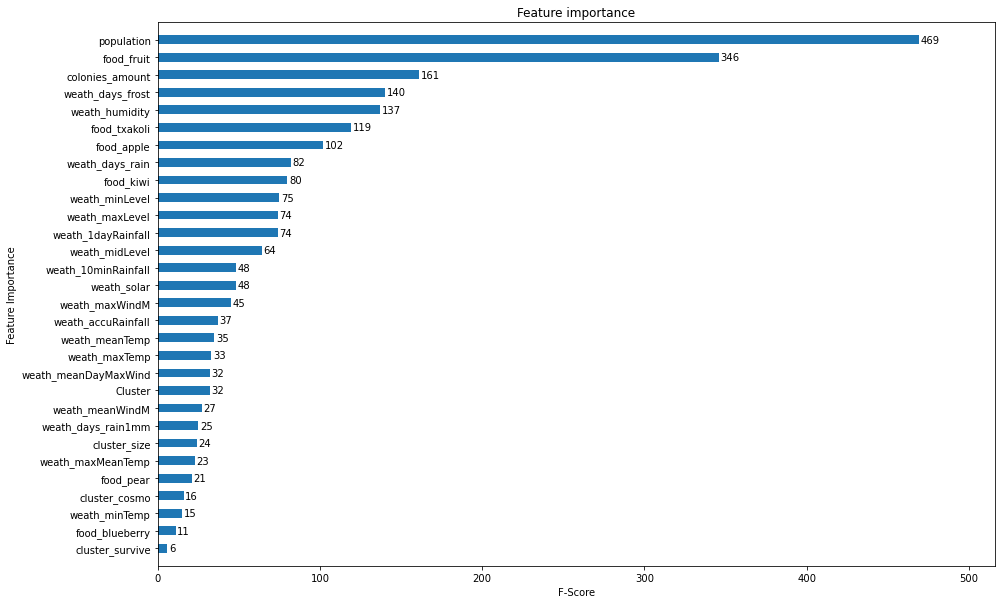

In [421]:
# get importance
importance = model_fi.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plot_importance(model_fi, height=0.5, xlabel="F-Score", ylabel="Feature Importance", grid=False)
plt.show()

In [422]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 5. Predict the labels for new data

In [340]:
y_predict = xgb.predict(X_predict)

In [341]:
accuracy_train = xgb.score(X_train, y_train)
print(f"Accuracy on the training set: {accuracy_train:.0%}")

Accuracy on the training set: 100%


In [342]:
accuracy_predict = xgb.score(X_predict, y_predict)
print(f"Accuracy on the test set: {accuracy_predict:.0%}")

Accuracy on the test set: 100%


In [343]:
y_predict.shape

(112,)

In [344]:
QUEEN_predict['NESTS'] = y_predict

In [345]:
QUEEN_predict['NESTS'].sum()

2772.4639

In [346]:
QUEEN_predict.NESTS[QUEEN_predict.NESTS < 0] = 0

<ipython-input-346-ef4b3a26f94e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QUEEN_predict.NESTS[QUEEN_predict.NESTS < 0] = 0


In [347]:
QUEEN_predict.NESTS.sum()

2779.7866

## Prepare the dataset for submission

In [348]:
HEX = QUEEN_predict.loc[:,['municip_code', 'municip_name', 'NESTS']]

## Adjust manually for Bilbao 48020 and generate the output

In [349]:
HEX.loc[HEX.municip_code.isin([48020]), 'NESTS'] = 0

In [350]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
27,48020,Bilbao,0.000000
60,48022,Karrantza Harana/Valle de Carranza,9.279720
62,48051,Lanestosa,0.518545
83,48071,Muskiz,20.249128
99,48088,Ubide,3.665187
102,48074,Urduña/Orduña,33.788506


In [351]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

In [352]:
check_data(HEX)

Submission form Shape is (112, 3)
Number of Municipalities is 112
The Total 2020 Nests' Prediction is 2759


'All Municipality Names and Codes to be submitted match the Template'

### Export dataset for submission

In [165]:
HEX.to_csv('WaspBusters_20210609_batch-XGBy-48019prodigal.csv', index=False)

## VERSION Manual adjustments

In [353]:
HEX.columns = ['municip_code', 'municip_name', 'NESTS'] # change column names to Spanish (Competition template)

In [354]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051]), 'NESTS'] = [0,0,1,0,1]

In [355]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
27,48020,Bilbao,0.0
60,48022,Karrantza Harana/Valle de Carranza,0.0
62,48051,Lanestosa,0.0
83,48071,Muskiz,1.0
99,48088,Ubide,0.0
102,48074,Urduña/Orduña,1.0


In [356]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

In [357]:
check_data(HEX)

Submission form Shape is (112, 3)
Number of Municipalities is 112
The Total 2020 Nests' Prediction is 2694


'All Municipality Names and Codes to be submitted match the Template'

### Export dataset for submission

In [108]:
HEX.to_csv('WaspBusters_20210609_batch-XGBy-48019prodigal-manual0s.csv', index=False)